## Ch.3.2 유튜브 랭킹 데이터 수집과 시각화

In [32]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

browser = webdriver.Chrome()
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube'
browser.get(url)

soup = BeautifulSoup(browser.page_source, 'html.parser')

In [48]:
channel_list = soup.select('form > table > tbody > tr')
channel = channel_list[0]

category = channel.select('p.category')[0].text.strip()
title = channel.select('a')[0].text.strip()
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

In [53]:
for channel in channel_list:
    category = channel.select('p.category')[0].text.strip()
    title = channel.select('h1 > a')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text
    view = channel.select('.view_cnt')[0].text
    video = channel.select('.video_cnt')[0].text
    print(category, title, subscriber, view, video)

[음악/댄스/가수] BLACKPINK 6420만 190억9788만 371개
[음악/댄스/가수] HYBE LABELS 6050만 188억2855만 656개
[음악/댄스/가수] BANGTANTV 5670만 123억1572만 1,582개
[음악/댄스/가수] SMTOWN 2860만 219억6449만 3,729개
[키즈/어린이] Boram Tube Vlog [보람튜브 브이로그] 2650만 110억5288만 223개
[음악/댄스/가수] 1MILLION Dance Studio 2420만 67억0781만 2,929개
[음악/댄스/가수] 1theK (원더케이) 2330만 206억4367만 15,006개
[음악/댄스/가수] JYP Entertainment 2170만 137억8091만 1,339개
[미분류] Coldplay 1930만 127억9973만 280개
[음악/댄스/가수] Mnet K-POP 1850만 130억3916만 25,618개
[음악/댄스/가수] JFlaMusic 1720만 34억2666만 279개
[TV/방송] KBS WORLD TV 1660만 123억9350만 52,450개
[음악/댄스/가수] officialpsy 1510만 86억3926만 90개
[음식/요리/레시피] Jane ASMR 제인 1420만 49억3799만 1,195개
[음악/댄스/가수] BIGBANG 1380만 66억8826만 773개
[음악/댄스/가수] TWICE 1150만 22억2158만 594개
[키즈/어린이] Nao FunFun 1080만 393만 34개
[음악/댄스/가수] Stone Music Entertainment 999만 78억8412만 7,947개
[키즈/어린이] DuDuPopTOY 985만 43억7833만 1,754개
[음식/요리/레시피] Hongyu ASMR 홍유 979만 27억0924만 387개
[키즈/어린이] 핑크퐁 (인기 동요・동화) 948만 57억2598만 2,233개
[TV/방송] MBCkpop 943만 73억7941만 40,723개
[키즈/어린이] 서은이야기[Seoeu

In [60]:
results = []
for page in range(1,11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}" 
    browser.get(url)
    time.sleep(2)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip() 
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text 
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        results.append(data)

In [61]:
df = pd.DataFrame(results)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('./Sample/youtube_rank.xlsx', index = False)

## 시각화 (Matplotlib)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# 엑셀 파일 불러오기
df = pd.read_excel('./Sample/youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],6420만,190억9788만,371개
1,HYBE LABELS,[음악/댄스/가수],6050만,188억2855만,656개
2,BANGTANTV,[음악/댄스/가수],5670만,123억1572만,"1,582개"
3,SMTOWN,[음악/댄스/가수],2860만,219억6449만,"3,729개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [8]:
# replaced_subscriber 시리즈 문자열 변경하기
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],6420만,190억9788만,371개,64200000
1,HYBE LABELS,[음악/댄스/가수],6050만,188억2855만,656개,60500000
2,BANGTANTV,[음악/댄스/가수],5670만,123억1572만,"1,582개",56700000
3,SMTOWN,[음악/댄스/가수],2860만,219억6449만,"3,729개",28600000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000


In [10]:
# Series 데이터 타입 변환하기
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [11]:
# 카테고리별 구독자 수, 채널 수 피봇 테이블 생성하기
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],97710000,71
[IT/기술/컴퓨터],7980000,8
[TV/방송],230230000,146
[게임],66700000,73
[교육/강의],23500000,22


In [12]:
# 데이터 프레임 컬럼명 지정하기
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],97710000,71
[IT/기술/컴퓨터],7980000,8
[TV/방송],230230000,146
[게임],66700000,73
[교육/강의],23500000,22


In [13]:
pivot_df.columns

Index(['subscriber_sum', 'category_count'], dtype='object')

In [14]:
# 데이터프레임의 인덱스 초기화하기 / 기존의 인덱스를 컬럼으로 변경가능
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],97710000,71
1,[IT/기술/컴퓨터],7980000,8
2,[TV/방송],230230000,146
3,[게임],66700000,73
4,[교육/강의],23500000,22


In [15]:
# 데이터프레임을 내림차순 정렬하기 / 정렬 기준 2개 이상에서는 by 뒤에 리스트로 묶기
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],676370000,171
17,[키즈/어린이],257960000,88
2,[TV/방송],230230000,146
11,[음식/요리/레시피],180570000,84
7,[미분류],144810000,115


In [17]:
# 그래프에서 한글을 표기하기 위한 글꼴 변경(윈도우, macOS에 대해 각각 처리)
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

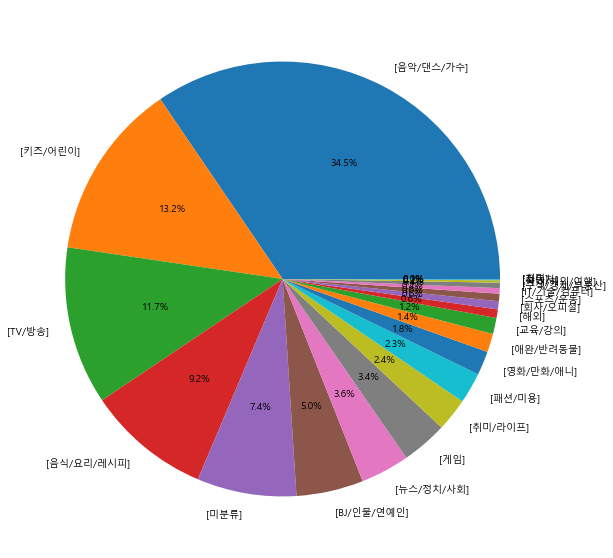

In [19]:
# 카테고리별 구독자수 시각화
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(30, 10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()